# Hi. Im Mihir. 

First of all i would like to mention that i really enjoyed doing these tasks...!
It used up all my knowledge in Physics and Deep Learning and it was fun to actually work on these 2 fields simulataneuosly. 
A wonderful fusion..!
I would love to continue doing such tasks and projects

## My Understanding for the problem (in short)

CMS Generates almost 40TB of data of events each second.
Most of the data is reduntant and there are only few special events that happen very rarely and we would like to study and explore that...

To get rid of the non-interesting(redundant) data focus on special events CERN has developed a two staged CMS trigger
Any event can be called special if the actual momentum of the corresponding muons is high
###### Level 1:  runs in hardware online reducing the throughput of data from 40 MHz to 100 KHz
###### Level 2 (HLT):  operates in software online reducing the rate from 100 KHz to 1 KHz

So basically task is to make a classifier, that given current readings of the collision classifies event as special or not based on momentum

## Dataset Description

There are 12 detectors: 5 CSC, 4 RPC, 3 GEM.<br />
Each detector records 7 features of a hit location:

<b>Phi angle, Theta angle</b>: Position and Spatial Orientation of hit location at each detector<br/>
<b>Bending Angle</b>: Angle of deflection of muon due Magnetic field

# Task1 and Task 2

Perform <b>classification</b> where muon momenta are clustered into 4 ranges of absolute
<br/>
p_T ranges: 0-10 GeV, 10-30 GeV, 30-100 GeV and >100 GeV.
<br/> 
Develop a Fully-Connected Network using a framework of your choice and evaluate its ability in classifying muon momentum ranges using the raw data muon data

# Importing Libraries

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [2]:
#Load Dataset
temp = np.load('histos_tba.20.npz')
variables=temp["variables"]
parameters=temp["parameters"]

print(variables.shape)
print(parameters.shape)

(3272341, 87)
(3272341, 3)


# Data Preparation

In [3]:
columns=[]
for i in range(0,12):
    columns.append("Phi_"+str(i))
for i in range(12,24):
    columns.append("Theta_"+str(i-12))
for i in range(24,36):
    columns.append("Bending_Angle"+str(i-24))
for i in range(36,48):
    columns.append("Time_info"+str(i-36))
for i in range(48,60):
    columns.append("Ring_no"+str(i-48))
for i in range(60,72):
    columns.append("Front/Rear"+str(i-60))
for i in range(72,84):
    columns.append("Mask"+str(i-72))
for i in range(84,87):
    columns.append("X_road"+str(i-84))
columns2=["q/pt","phi","eta"]

In [4]:
df=pd.DataFrame(data=variables,columns=columns)
y=pd.DataFrame(data=parameters,columns=columns2)

In [5]:
df["Y"]=y["q/pt"]
df["Y"]=df["Y"].transform(lambda x:1/x)
df.head(10)

,Phi_0,Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,Phi_6,Phi_7,Phi_8,Phi_9,...,Mask6,Mask7,Mask8,Mask9,Mask10,Mask11,X_road0,X_road1,X_road2,Y
0,3190.0,NaN,3546.0,3568.0,NaN,NaN,NaN,3568.0,NaN,3127.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,108.0,-2.244101
1,2865.0,NaN,2622.0,2608.0,NaN,NaN,NaN,2604.0,2600.0,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,84.0,2.833134
2,NaN,1415.0,1455.0,1440.0,1408.0,1440.0,1460.0,1424.0,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,4.0,5.0,45.0,-6.144695
3,3484.0,NaN,3328.0,3328.0,3360.0,NaN,NaN,3336.0,NaN,3520.0,...,1.0,0.0,1.0,0.0,0.0,1.0,5.0,3.0,105.0,5.518491
4,4867.0,NaN,NaN,4648.0,4688.0,NaN,NaN,4656.0,4696.0,4923.0,...,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,146.0,2.620281
5,3875.0,NaN,4008.0,4024.0,4032.0,NaN,NaN,4028.0,4032.0,3850.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,124.0,-6.843162
6,4308.0,NaN,3838.0,NaN,NaN,NaN,NaN,NaN,NaN,4387.0,...,1.0,1.0,1.0,0.0,0.0,0.0,8.0,1.0,124.0,2.378406
7,3426.0,NaN,3720.0,3808.0,NaN,NaN,NaN,3816.0,3860.0,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,116.0,-2.898209
8,4269.0,NaN,4022.0,3976.0,3928.0,NaN,NaN,3956.0,3904.0,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,127.0,2.724614
9,2096.0,NaN,1872.0,1872.0,1910.0,NaN,NaN,1876.0,NaN,2142.0,...,1.0,0.0,1.0,0.0,0.0,1.0,6.0,2.0,60.0,3.734490


### Finding Missing data

In [6]:
#Plotting available data for each station
phi_col = [col for col in df if col.startswith('Phi_')]
import missingno as msno 
msno.bar(df[phi_col]) 

From the above graph we can see that more than <b>50%</b> the data from Detector number 1,5,6,7,11 (staring from 0) is <b>missing</b>.

From which we can draw few conclusions:<br/>
<ul>
<li>Firstly, this might be an indication that algortihm used to generate this data is less biased towards these detecors</li>
<li>Or if not that, It is possible that the missing data is showing some actual physical property of the muons, which is making it avoid these detectors most of the times</li>
</ul>

Whatever might be the case, now we have 2 options to deal with this situatuion:
<ol>
    <li>Try doing Linear Interpolation for values of phi, theta as these values will always be increasing or decreasing in order</li>
    <li> Drop columns of these detectors(Not Recommended)</li>
</ol>

In [7]:
#Seems like algorithm use for generation of data is biased or its actually in real world
col=[
    'Phi_1', 'Phi_5', 'Phi_6', 'Phi_9', 'Phi_11', 
     'Theta_1', 'Theta_5', 'Theta_6', 'Theta_9', 'Theta_11', 
     'Bending_Angle1', 'Bending_Angle5', 'Bending_Angle6', 'Bending_Angle9', 'Bending_Angle11', 
     'Time_info0', 'Time_info1','Time_info2','Time_info3','Time_info4','Time_info5', 'Time_info6','Time_info7','Time_info8', 'Time_info9', 'Time_info10','Time_info11', 
     'Ring_no1', 'Ring_no5', 'Ring_no6', 'Ring_no9', 'Ring_no11', 
     'Front/Rear1', 'Front/Rear5', 'Front/Rear6', 'Front/Rear9', 'Front/Rear11'
    ]

In [8]:
df2=df.drop(col,axis=1,inplace=False)

In [9]:
df2.columns

Index(['Phi_0', 'Phi_2', 'Phi_3', 'Phi_4', 'Phi_7', 'Phi_8', 'Phi_10',
       'Theta_0', 'Theta_2', 'Theta_3', 'Theta_4', 'Theta_7', 'Theta_8',
       'Theta_10', 'Bending_Angle0', 'Bending_Angle2', 'Bending_Angle3',
       'Bending_Angle4', 'Bending_Angle7', 'Bending_Angle8', 'Bending_Angle10',
       'Ring_no0', 'Ring_no2', 'Ring_no3', 'Ring_no4', 'Ring_no7', 'Ring_no8',
       'Ring_no10', 'Front/Rear0', 'Front/Rear2', 'Front/Rear3', 'Front/Rear4',
       'Front/Rear7', 'Front/Rear8', 'Front/Rear10', 'Mask0', 'Mask1', 'Mask2',
       'Mask3', 'Mask4', 'Mask5', 'Mask6', 'Mask7', 'Mask8', 'Mask9', 'Mask10',
       'Mask11', 'X_road0', 'X_road1', 'X_road2', 'Y'],
      dtype='object')

In my case, I have directly dropped the columns and then dropped the rows containing missig values("NA")<br/>
But i think filling the missing values of phi and theta with linear interpolation and then repeating the same steps is worth a try as it will save some more valuable data

In [48]:
df3=df2.dropna(axis=0)
print(len(df3))
#TO DO: Try Linear Interpolation

712329


### Plot for eta,phi and Pt

(3272341,) (3272341,) (3272341,)


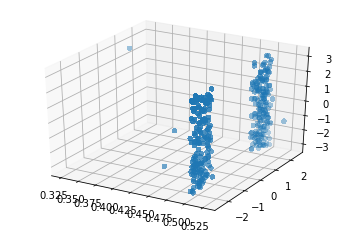

In [49]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
Z = min_max_scaler.fit_transform(np.array(df["Y"]).reshape(-1,1))
Z=Z.reshape(len(y),)
print(Z.shape,y["phi"].shape,y["eta"].shape)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
X = y["phi"][::10000]
Y =  y["eta"][::10000]
#X, Y = np.meshgrid(X, Y)
Z=Z[::10000]
ax.scatter(Z,Y,X,linewidth=0, antialiased=False)
plt.show()

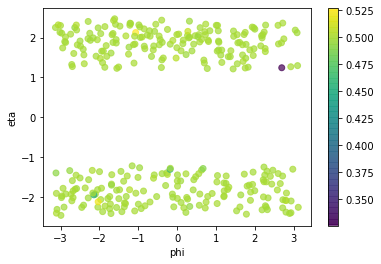

In [50]:
plt.scatter(X, Y, c=Z, alpha=0.7,cmap='viridis')
plt.colorbar()
plt.xlabel("phi")
plt.ylabel("eta");

#### My next step was to replace the Phi and theta's with delta phi and delta theta

In [51]:
phi=pd.DataFrame()
phi_col = [col for col in df3 if col.startswith('Phi_')]
phi=df3[phi_col].T
phi.head()

,5,8,10,20,28,38,43,48,62,63,...,3272297,3272305,3272308,3272313,3272314,3272316,3272320,3272326,3272334,3272336
Phi_0,3875.0,4269.0,4089.0,3924.0,4544.0,2043.0,4278.0,1294.0,2537.0,3716.0,...,2212.0,1798.0,3176.0,2644.0,4782.0,1295.0,2306.0,2364.0,3932.0,2477.0
Phi_2,4008.0,4022.0,4096.0,4008.0,4744.0,1726.0,4304.0,1384.0,2360.0,3696.0,...,2664.0,1710.0,3258.0,2776.0,4866.0,1368.0,2256.0,2408.0,3806.0,2432.0
Phi_3,4024.0,3976.0,4098.0,4040.0,4752.0,1688.0,4312.0,1392.0,2304.0,3680.0,...,2530.0,1696.0,3272.0,2800.0,4880.0,1392.0,2240.0,2416.0,3776.0,2422.0
Phi_4,4032.0,3928.0,4104.0,4048.0,4736.0,1728.0,4312.0,1392.0,2288.0,3680.0,...,2402.0,1688.0,3270.0,2800.0,4888.0,1400.0,2240.0,2424.0,3784.0,2424.0
Phi_7,4028.0,3956.0,4108.0,4040.0,4744.0,1696.0,4316.0,1392.0,2300.0,3684.0,...,2472.0,1692.0,3268.0,2800.0,4884.0,1392.0,2240.0,2420.0,3776.0,2424.0


In [52]:
#Adding Delta Phi
phi_final=pd.DataFrame()
for i in range(len(phi)-1):
    #print(phi.loc[phi_col[i]])
    a=np.array(phi.loc[phi_col[i]])-np.array(phi.loc[phi_col[i+1]])
    df3["Delta_"+str(i)]=a
df3.head()

,Phi_0,Phi_2,Phi_3,Phi_4,Phi_7,Phi_8,Phi_10,Theta_0,Theta_2,Theta_3,...,X_road0,X_road1,X_road2,Y,Delta_0,Delta_1,Delta_2,Delta_3,Delta_4,Delta_5
5,3875.0,4008.0,4024.0,4032.0,4028.0,4032.0,3994.0,23.0,24.0,23.0,...,3.0,1.0,124.0,-6.843162,-133.0,-16.0,-8.0,4.0,-4.0,38.0
8,4269.0,4022.0,3976.0,3928.0,3956.0,3904.0,4066.0,10.0,9.0,8.0,...,7.0,0.0,127.0,2.724614,247.0,46.0,48.0,-28.0,52.0,-162.0
10,4089.0,4096.0,4098.0,4104.0,4108.0,4104.0,4098.0,9.0,9.0,9.0,...,4.0,0.0,128.0,-52.140009,-7.0,-2.0,-6.0,-4.0,4.0,6.0
20,3924.0,4008.0,4040.0,4048.0,4040.0,4048.0,4004.0,19.0,18.0,18.0,...,3.0,1.0,126.0,-7.159509,-84.0,-32.0,-8.0,8.0,-8.0,44.0
28,4544.0,4744.0,4752.0,4736.0,4744.0,4744.0,4731.0,40.0,39.0,39.0,...,2.0,3.0,149.0,-4.734953,-200.0,-8.0,16.0,-8.0,0.0,13.0


In [53]:
df3.describe()

,Phi_0,Phi_2,Phi_3,Phi_4,Phi_7,Phi_8,Phi_10,Theta_0,Theta_2,Theta_3,...,X_road0,X_road1,X_road2,Y,Delta_0,Delta_1,Delta_2,Delta_3,Delta_4,Delta_5
count,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,...,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000,712329.000000
mean,2911.141113,2911.782715,2912.076172,2912.419189,2912.235596,2912.660156,2911.498291,19.489714,18.560083,18.306213,...,3.969208,0.893910,91.187546,-0.114751,-0.641428,-0.292406,-0.343729,0.183800,-0.424124,1.161493
std,1063.791748,1066.394531,1067.765503,1066.645752,1067.305054,1066.362549,1065.160645,9.556087,9.222220,9.160045,...,1.863050,0.993329,33.246265,113.183658,188.212158,32.296497,34.168011,23.989052,35.614395,69.582802
min,678.000000,144.000000,160.000000,160.000000,156.000000,156.000000,164.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,8.000000,-6812.746271,-633.000000,-302.000000,-453.000000,-387.000000,-440.000000,-596.000000
25%,2024.000000,2022.000000,2024.000000,2024.000000,2020.000000,2024.000000,2020.000000,12.000000,11.000000,11.000000,...,3.000000,0.000000,63.000000,-4.833131,-130.000000,-16.000000,-8.000000,-8.000000,-8.000000,-28.000000
50%,2894.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2895.000000,19.000000,18.000000,18.000000,...,4.000000,1.000000,91.000000,-2.044194,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3795.000000,3782.000000,3778.000000,3782.000000,3780.000000,3780.000000,3780.000000,25.000000,23.000000,23.000000,...,5.000000,1.000000,118.000000,4.685856,130.000000,16.000000,8.000000,8.000000,8.000000,30.000000
max,4954.000000,4954.000000,4944.000000,4938.000000,4916.000000,4916.000000,4943.000000,53.000000,49.000000,51.000000,...,8.000000,4.000000,154.000000,6773.725270,648.000000,307.000000,412.000000,319.000000,440.000000,604.000000


In [54]:
# Adding Delta Theta
theta_col = [col for col in df3 if col.startswith('Theta_')]
theta=df3[theta_col].T
theta_final=pd.DataFrame()
for i in range(len(theta)-1):
    #print(phi.loc[phi_col[i]])
    a=np.array(theta.loc[theta_col[i]])-np.array(theta.loc[theta_col[i+1]])
    df3["Delta_theta_"+str(i)]=a
df3.head()

,Phi_0,Phi_2,Phi_3,Phi_4,Phi_7,Phi_8,Phi_10,Theta_0,Theta_2,Theta_3,...,Delta_2,Delta_3,Delta_4,Delta_5,Delta_theta_0,Delta_theta_1,Delta_theta_2,Delta_theta_3,Delta_theta_4,Delta_theta_5
5,3875.0,4008.0,4024.0,4032.0,4028.0,4032.0,3994.0,23.0,24.0,23.0,...,-8.0,4.0,-4.0,38.0,-1.0,1.0,-1.0,0.0,0.0,0.0
8,4269.0,4022.0,3976.0,3928.0,3956.0,3904.0,4066.0,10.0,9.0,8.0,...,48.0,-28.0,52.0,-162.0,1.0,1.0,0.0,4.0,-4.0,1.0
10,4089.0,4096.0,4098.0,4104.0,4108.0,4104.0,4098.0,9.0,9.0,9.0,...,-6.0,-4.0,4.0,6.0,0.0,0.0,0.0,-3.0,4.0,1.0
20,3924.0,4008.0,4040.0,4048.0,4040.0,4048.0,4004.0,19.0,18.0,18.0,...,-8.0,8.0,-8.0,44.0,1.0,0.0,0.0,-2.0,4.0,-3.0
28,4544.0,4744.0,4752.0,4736.0,4744.0,4744.0,4731.0,40.0,39.0,39.0,...,16.0,-8.0,0.0,13.0,1.0,0.0,-1.0,0.0,-4.0,4.0


In [55]:
bend_col = [col for col in df3 if col.startswith('Bending_Angle')]
df3[bend_col].describe()

,Bending_Angle0,Bending_Angle2,Bending_Angle3,Bending_Angle4,Bending_Angle7,Bending_Angle8,Bending_Angle10
count,712329.000000,712329.000000,712329.000000,712329.000000,712329.0,712329.0,712329.000000
mean,0.115439,0.005600,0.002608,0.001675,0.0,0.0,0.003088
std,14.949262,0.283622,0.253603,0.266299,0.0,0.0,0.610007
min,-132.910263,-1.000000,-1.000000,-1.000000,0.0,0.0,-2.000000
25%,-11.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,11.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,142.140137,1.000000,1.000000,1.000000,0.0,0.0,2.000000


In [56]:
print(phi_col)
df3.drop(phi_col,inplace=True,axis=1)
df3.drop(theta_col,inplace=True,axis=1)

['Phi_0', 'Phi_2', 'Phi_3', 'Phi_4', 'Phi_7', 'Phi_8', 'Phi_10']


In [57]:
df3.isnull().sum().sum()

0

6773.725270317757
-6812.746271053797


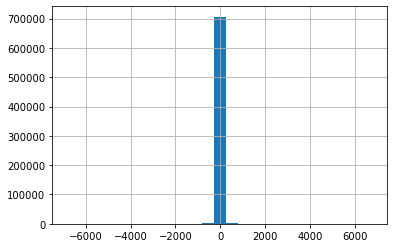

In [58]:
print(max(df3["Y"]))
print(min(df3["Y"]))
hist=df3["Y"].hist(bins=25)

{'whiskers': [<matplotlib.lines.Line2D at 0x2e80d36feb8>,
 'caps': [<matplotlib.lines.Line2D at 0x2e80d37b860>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e80d36fd68>],
 'medians': [<matplotlib.lines.Line2D at 0x2e80d37bef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e80d37bfd0>],
 'means': []}

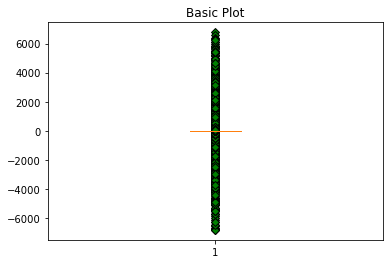

In [59]:
import matplotlib.pyplot as plt
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df3["Y"],flierprops=green_diamond)

As we can observe from above plots that the data for higher Pt is very rare and distribution has high kurtosis

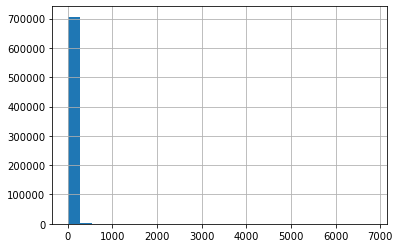

In [60]:
df3["Y"]=df3["Y"].transform(lambda x:abs(x))
df4=df3.copy() #for Regression
df3["Y"].hist(bins=25)

### Making 4 categories of Ranges of Pt of the muons

In [61]:
from keras.utils import np_utils#to_categorical
bins=[-1,10,30,100,np.inf]
names = [1, 2, 3, 4]
coltmp=["0","1","2","3","4"]
df3["Y"] = pd.cut(df3["Y"], bins=bins, labels=names)
#Y_cat = np_utils.to_categorical(tmp)
#Y_cat=pd.DataFrame(Y_cat,columns=coltmp)
#Y_cat = pd.DataFrame(tmp)
df3["Y"].head()

5     1
8     1
10    3
20    1
28    1
Name: Y, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

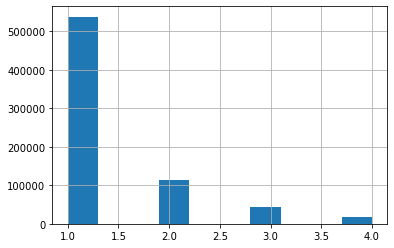

In [62]:
df3["Y"].hist()

In [63]:
count=len(df3.loc[df3["Y"]==4])
print(count)

17512


In [64]:
c1=df3.loc[df3["Y"]==1]
c2=df3.loc[df3["Y"]==2]
c3=df3.loc[df3["Y"]==3]
c4=df3.loc[df3["Y"]==4]
c1=c1[:20000]
c2=c2[:20000]
c3=c3[:20000]
print(len(c1),len(c2),len(c3))

20000 20000 20000


In [65]:
frames = [c1, c2, c3,c4]
result = pd.concat(frames)
result.head()

,Bending_Angle0,Bending_Angle2,Bending_Angle3,Bending_Angle4,Bending_Angle7,Bending_Angle8,Bending_Angle10,Ring_no0,Ring_no2,Ring_no3,...,Delta_2,Delta_3,Delta_4,Delta_5,Delta_theta_0,Delta_theta_1,Delta_theta_2,Delta_theta_3,Delta_theta_4,Delta_theta_5
5,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,-8.0,4.0,-4.0,38.0,-1.0,1.0,-1.0,0.0,0.0,0.0
8,-16.613783,-1.0,0.0,0.0,0.0,0.0,-1.0,4.0,1.0,1.0,...,48.0,-28.0,52.0,-162.0,1.0,1.0,0.0,4.0,-4.0,1.0
20,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,-8.0,8.0,-8.0,44.0,1.0,0.0,0.0,-2.0,4.0,-3.0
28,13.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,16.0,-8.0,0.0,13.0,1.0,0.0,-1.0,0.0,-4.0,4.0
38,-18.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,-40.0,32.0,-40.0,-8.0,1.0,0.0,0.0,-1.0,0.0,0.0


In [66]:
Y=result["Y"]
X=result.drop(["Y"],axis=1)
print(len(X))
print(len(Y))

77512
77512


In [67]:
coltmp=["0","1","2","3","4"]
Y_cat = np_utils.to_categorical(Y)
Y_cat=pd.DataFrame(Y_cat,columns=coltmp)
#Y_cat = pd.DataFrame(tmp)

In [68]:
Y_cat.drop(columns=["0"],inplace=True)

In [69]:
Y_cat.describe()

,1,2,3,4
count,77512.000000,77512.000000,77512.000000,77512.000000
mean,0.258025,0.258025,0.258025,0.225926
std,0.437550,0.437550,0.437550,0.418194
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [70]:
for i in Y_cat.columns:
    print(i,sum(Y_cat[i]))

1 20000.0
2 20000.0
3 20000.0
4 17512.0


In [71]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(X.shape,Y_cat.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=1)
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

(77512, 48) (77512, 4)


In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.utils import np_utils
import keras

# Classification Model

In [35]:
def create_cat_model():
    model = Sequential()
    model.add(Dense(100, input_dim=len(X.columns), kernel_initializer='random_normal' , activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=0.15))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
model1=create_cat_model()
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model1.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])
#model1.compile(loss="mae", optimizer=Adam(), metrics=['mae'])

In [ ]:
history=model1.fit (X_train , y_train,epochs=20,verbose=1, batch_size=256,validation_data=(X_val,y_val))

In [ ]:
print(history.history.keys())

In [ ]:
 _, accuracy = model1.evaluate(X_test, y_test, batch_size=5, verbose=0)

In [ ]:
print('test loss, test acc:', accuracy)

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# X_train_conv = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test_conv = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model2.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1,validation_data=(X_val,y_val))

In [ ]:
print('test loss, test acc:', accuracy)

# Convolution 1D Classification Model

In [78]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(Y_cat.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=1)
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

(77512, 4)


In [90]:
from keras.layers import Conv1D, MaxPooling1D,Flatten
def create_conv_cat_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(len(X.columns),1)))
   # model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(70, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [91]:
X_train=np.array(X_train).reshape(X_train.shape[0],X_train.shape[1],1)
X_val=np.array(X_val).reshape(X_val.shape[0],X_val.shape[1],1)

In [92]:
model4=create_conv_cat_model()

In [93]:
print(X_train.shape,y_train.shape)
history=model4.fit (X_train , y_train, batch_size=1 ,epochs=5, verbose=1, validation_data=(X_val , y_val)) 

(49413, 48, 1) (49413, 4)
Train on 49413 samples, validate on 8721 samples
Epoch 1/5
49413/49413 [==============================] - 123s 2ms/step - loss: 0.7105 - acc: 0.6973 - val_loss: 0.6199 - val_acc: 0.7343
Epoch 2/5
49413/49413 [==============================] - 108s 2ms/step - loss: 0.6493 - acc: 0.7248 - val_loss: 0.5975 - val_acc: 0.7537
Epoch 3/5
49413/49413 [==============================] - 94s 2ms/step - loss: 0.6385 - acc: 0.7324 - val_loss: 0.5753 - val_acc: 0.7663
Epoch 4/5
49413/49413 [==============================] - 108s 2ms/step - loss: 0.6421 - acc: 0.7343 - val_loss: 0.6088 - val_acc: 0.7723
Epoch 5/5
49413/49413 [==============================] - 107s 2ms/step - loss: 0.6392 - acc: 0.7357 - val_loss: 0.6084 - val_acc: 0.7567


In [94]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


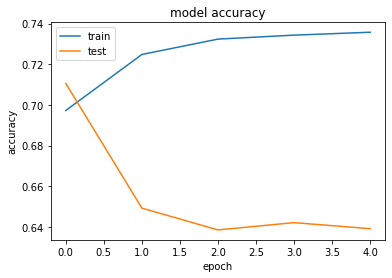

In [95]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Regression Model

In [96]:
Y_reg=df4["Y"]
X_reg=df4.drop(["Y"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.25, random_state=1)
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [97]:
def create_reg_model():
    model = Sequential()
    model.add(Dense(100, input_dim=len(X_reg.columns), kernel_initializer='random_normal' , activation='sigmoid'))
    model.add(Dense(70, activation='relu'))
    model.add(Dense(30, activation='relu'))
#     model.add(Dropout(rate=0.15))
#     model.add(Dense(10, activation='relu'))
    model.add(Dropout(rate=0.15))
    model.add(Dense(1,activation="linear"))
    model.compile(loss='mae', optimizer='adam', metrics=['mae'])
    return model

In [98]:
model3=create_reg_model()

In [100]:
history=model3.fit (X_train , y_train, batch_size=5 ,epochs=5, verbose=1, validation_data=(X_val , y_val)) 

Train on 454109 samples, validate on 80137 samples
Epoch 1/5
454109/454109 [==============================] - 226s 497us/step - loss: 9.4109 - mean_absolute_error: 9.4109 - val_loss: 9.3473 - val_mean_absolute_error: 9.3473
Epoch 2/5
454109/454109 [==============================] - 228s 503us/step - loss: 9.3803 - mean_absolute_error: 9.3803 - val_loss: 9.1269 - val_mean_absolute_error: 9.1269
Epoch 3/5
454109/454109 [==============================] - 103s 227us/step - loss: 9.3724 - mean_absolute_error: 9.3724 - val_loss: 9.0585 - val_mean_absolute_error: 9.0585
Epoch 4/5
454109/454109 [==============================] - 110s 241us/step - loss: 9.3529 - mean_absolute_error: 9.3529 - val_loss: 9.1056 - val_mean_absolute_error: 9.1056
Epoch 5/5
454109/454109 [==============================] - 101s 222us/step - loss: 9.3603 - mean_absolute_error: 9.3603 - val_loss: 9.1884 - val_mean_absolute_error: 9.1884


In [103]:
 _, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print('Error:', accuracy)

Error: 9.671674995724318


In [104]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


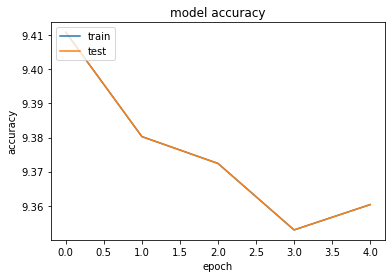

In [105]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Convolution 2D Model

In [106]:
def conv2d_classifier():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

### Using Bending angles as radius of dots

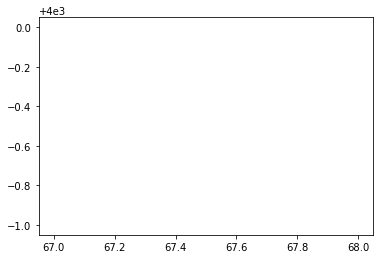

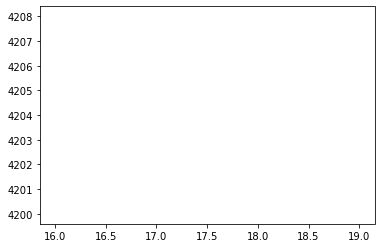

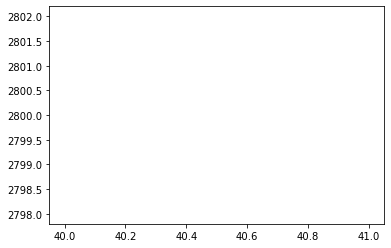

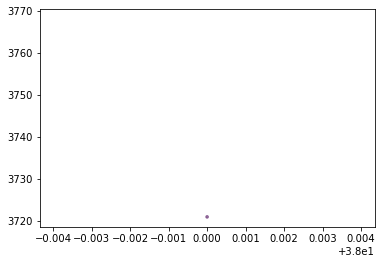

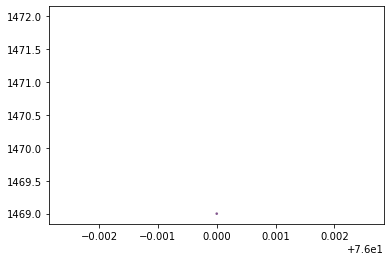

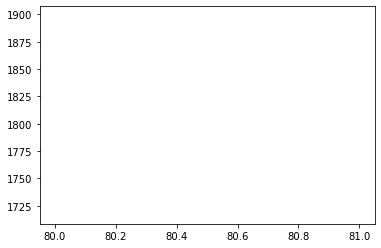

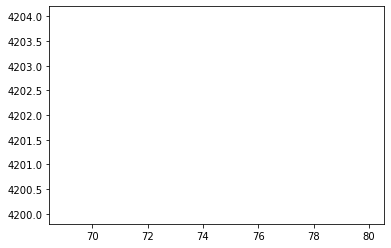

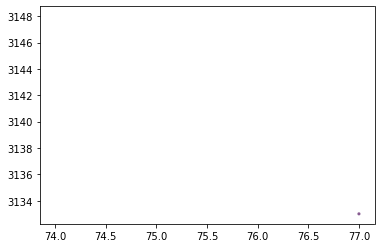

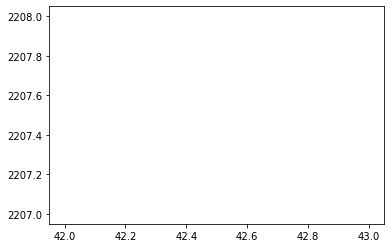

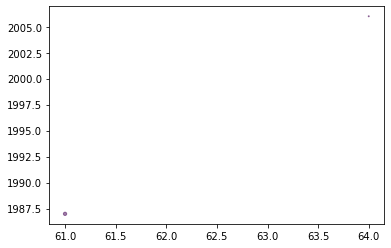

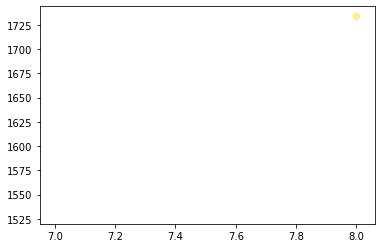

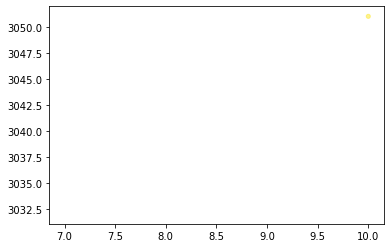

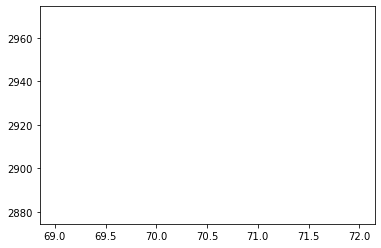

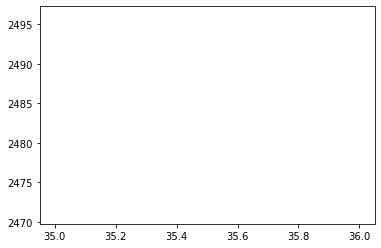

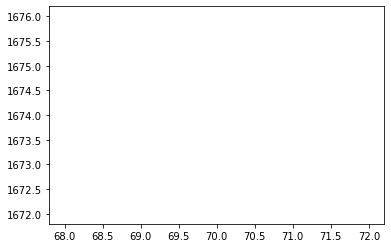

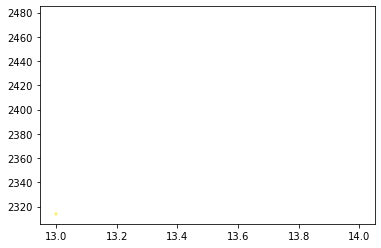

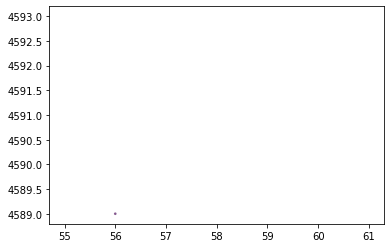

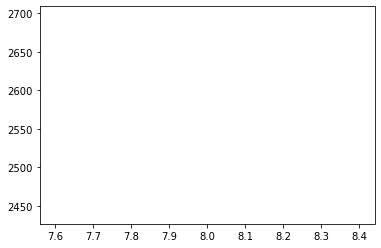

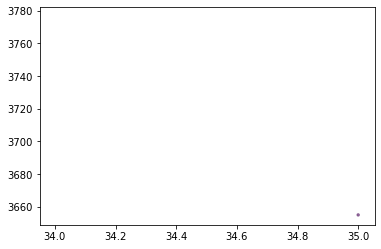

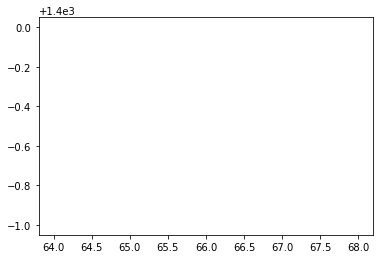

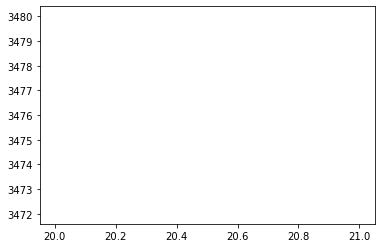

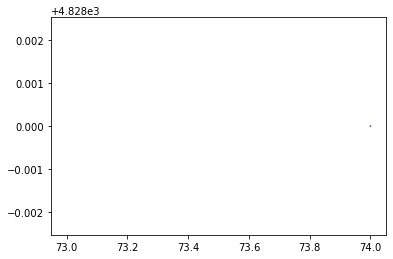

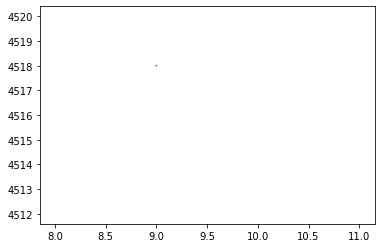

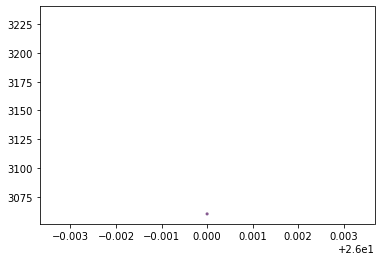

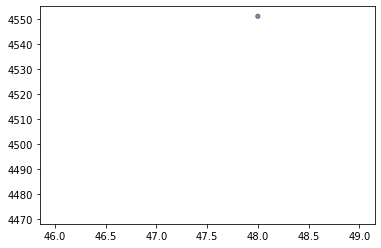

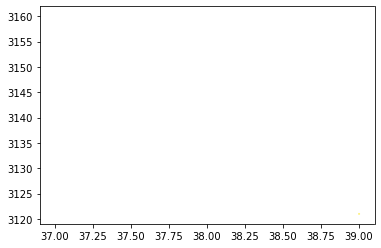

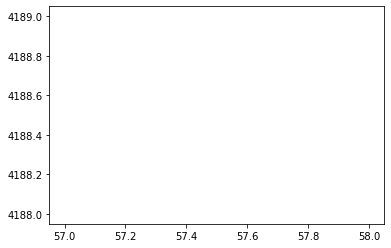

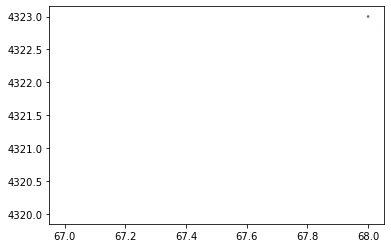

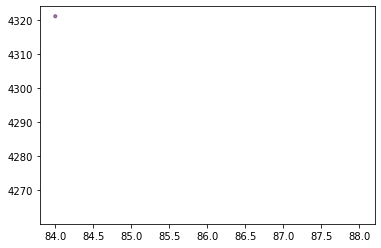

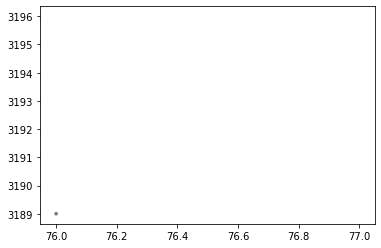

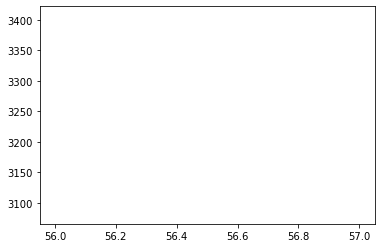

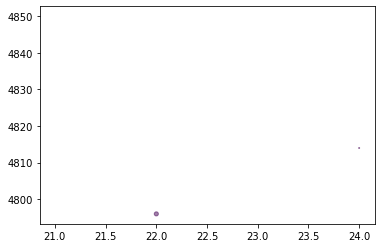

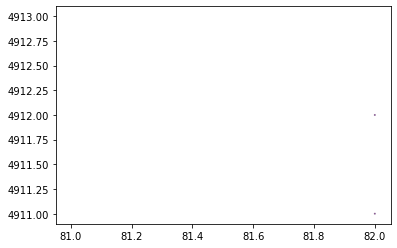

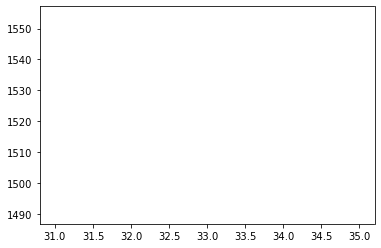

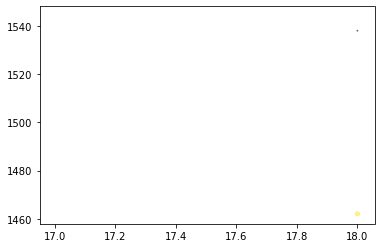

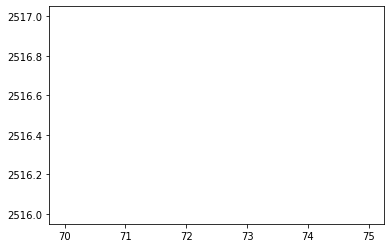

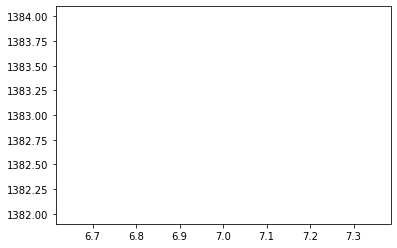

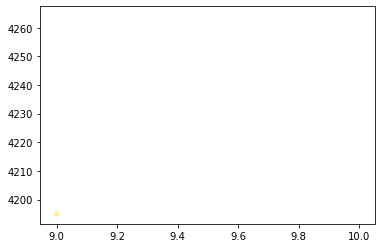

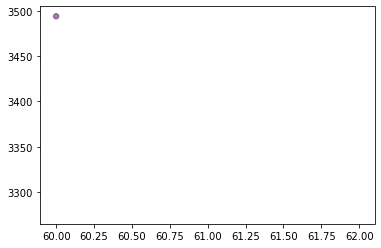

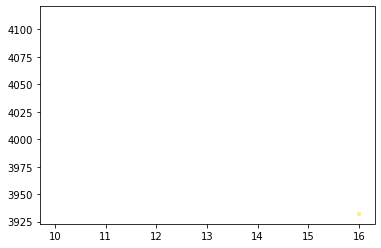

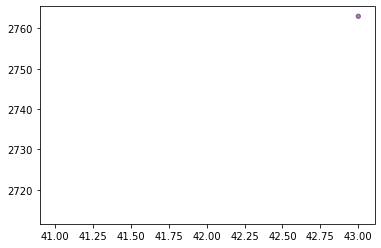

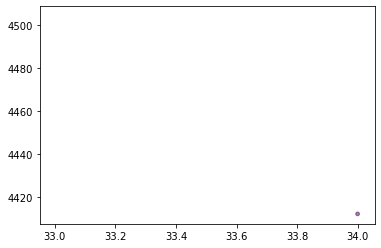

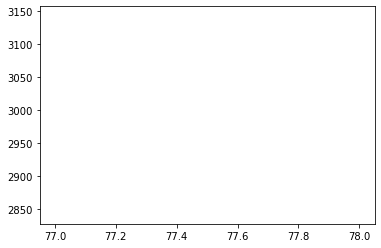

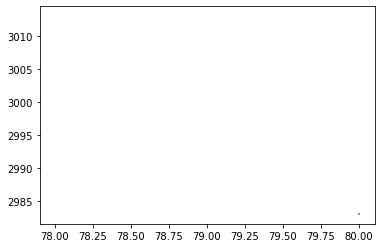

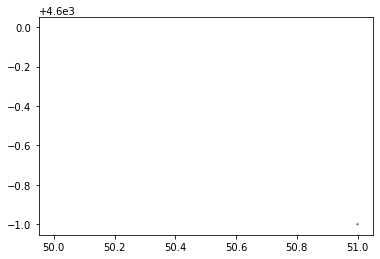

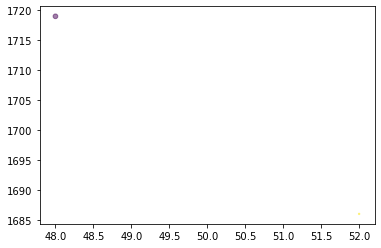

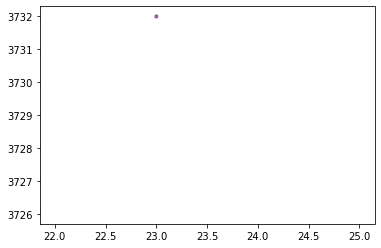

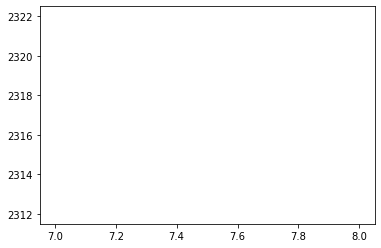

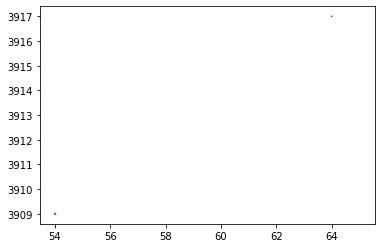

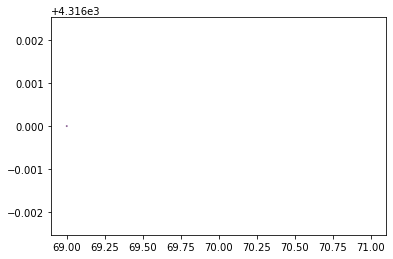

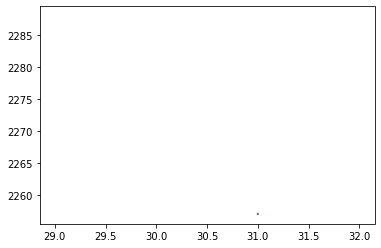

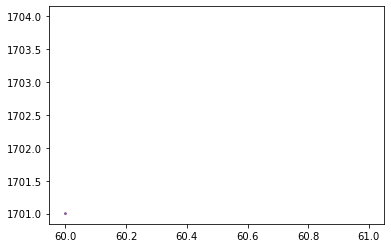

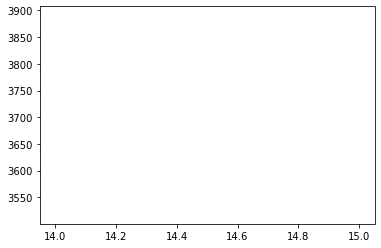

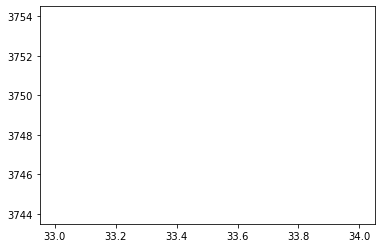

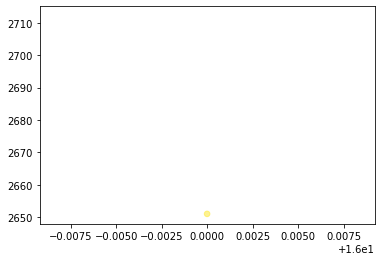

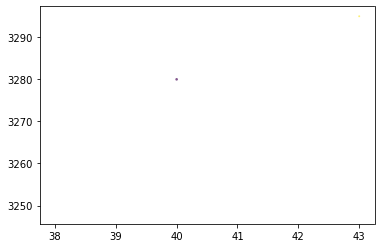

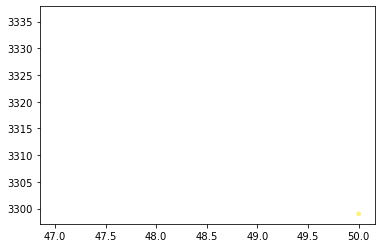

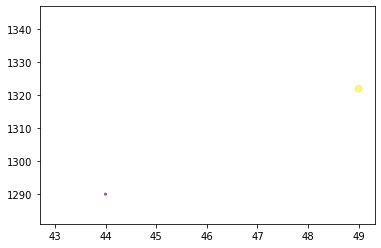

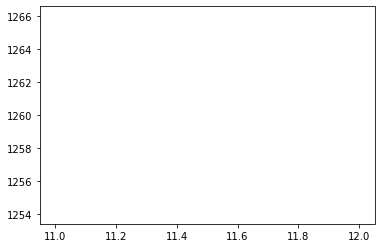

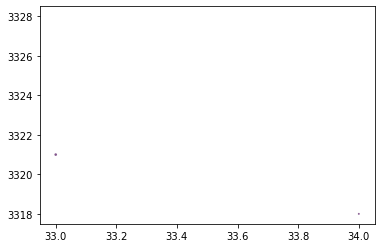

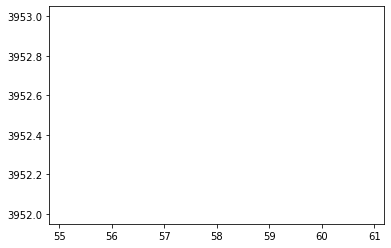

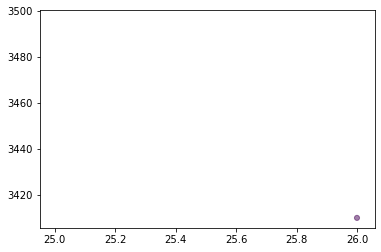

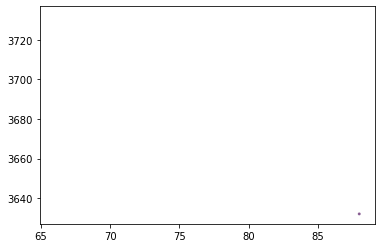

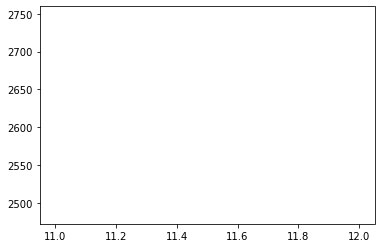

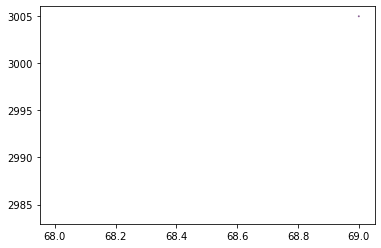

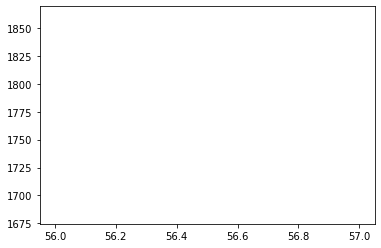

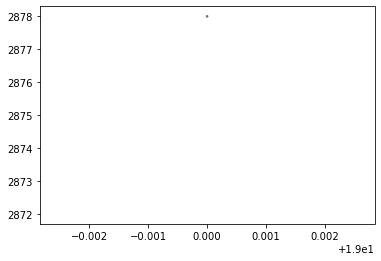

In [10]:
import matplotlib.pyplot as plt
import numpy as np
df_temp=df
col_temp=columns.append("Y")
df_temp=pd.DataFrame(df_temp,columns=col_temp)
for i in range(0,len(df_temp)):
    if(df_temp["Y"][i]>6200):
        X1=[df_temp["Theta_0"][i],df_temp["Theta_1"][i],df_temp["Theta_2"][i],df_temp["Theta_3"][i],df_temp["Theta_4"][i],df_temp["Theta_5"][i]]
        Y1=[df_temp["Phi_0"][i],df_temp["Phi_1"][i],df_temp["Phi_2"][i],df_temp["Phi_3"][i],df_temp["Phi_4"][i],df_temp["Phi_5"][i]]
        Z1=[abs(df_temp["Bending_Angle0"][i]),abs(df_temp["Bending_Angle1"][i]),abs(df_temp["Bending_Angle2"][i]),abs(df_temp["Bending_Angle3"][i]),abs(df_temp["Bending_Angle4"][i]),abs(df_temp["Bending_Angle5"][0]),]
        A1=[df_temp["Ring_no0"][i],df_temp["Ring_no1"][i],df_temp["Ring_no2"][i],df_temp["Ring_no3"][i],df_temp["Ring_no4"][i],df_temp["Ring_no5"][i]]
        #print(Z1)
        if(np.nan not in Z1):
            plt.scatter(X1, Y1, s=Z1*10000, c=A1,alpha=0.5)
            plt.show()

### As we can see even the images with high Pt are very much sparse hence better option to this would be 1D Covolutions

In [ ]:
 _, accuracy = model4.evaluate(X_test, y_test, verbose=0)